In [33]:
import sys
import time
import torch
import torchvision
from torchvision import transforms
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")


class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)


def load_time(data):
    tic = time.time()
    for X, y in data.train_dataloader():
        continue
    return time.time() - tic

In [16]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [17]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [21]:
f'{load_time(data):.2f} sec'

'4.30 sec'

# 4.2.5. Exercises

## 1. Does reducing the batch_size (for instance, to 1) affect the reading performance?

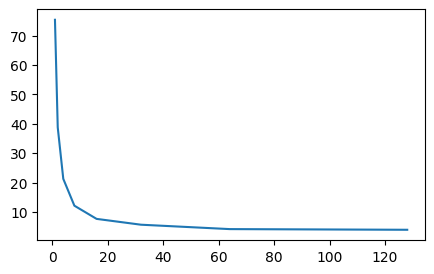

In [32]:
batches = d2l.gen_logrithm_nums(initial_value=1, growth_factor=2,
                                num_elements=8)
ts = [load_time(FashionMNIST(batch_size=batch, resize=(32, 32))) 
      for batch in batches]
plt.figure(figsize=(5, 3))
plt.plot(batches, ts)
plt.show()

Reducing the batch size in machine learning, particularly during training, can indeed affect the reading performance and overall training dynamics. Here's how it can impact different aspects:

**Reading Performance:**
When the batch size is reduced, the number of examples processed together in each iteration decreases. This can lead to an increase in the frequency of data loading and preprocessing operations, which may affect reading performance in the following ways:

1. **Higher Overhead:** Smaller batch sizes result in more frequent data loading, which can increase overhead due to data loading and preprocessing operations. This might lead to slower training if these operations take a significant amount of time.

2. **I/O and Disk Access:** Frequent data loading can put a strain on I/O systems, particularly in cases where data needs to be fetched from disk or over a network. Disk access latency and bandwidth limitations might become more pronounced with smaller batch sizes.

## 2. The data iterator performance is important. Do you think the current implementation is fast enough? Explore various options to improve it. Use a system profiler to find out where the bottlenecks are.

**Improving Data Iterator Performance:**

1. **Batching and Prefetching:** Implement batching and prefetching mechanisms to load and preprocess data in parallel. This can help overlap data loading with model computation, reducing overall training time.

2. **Parallelism:** Utilize multi-threading or multiprocessing to load and preprocess data in parallel. Libraries like TensorFlow's `tf.data` and PyTorch's `DataLoader` offer options to achieve this.

3. **Data Format:** Use efficient data formats like TFRecords or binary formats that can be read faster compared to text-based formats.

4. **Caching:** Cache preprocessed data to avoid redundant preprocessing during each epoch. This can be especially beneficial if data preprocessing is complex and time-consuming.

5. **Data Shuffling:** Shuffle the data at the beginning of each epoch to improve convergence speed and reduce potential bias in gradient updates.

6. **I/O Optimizations:** Minimize I/O operations by reading larger chunks of data at once, reducing the overhead associated with frequent small reads.

**Using System Profilers:**

System profilers are essential tools to identify performance bottlenecks in your code. Here's how you can use them:

1. **Select a Profiler:** Choose a profiler suitable for your programming language and platform. Common profilers include `cProfile` for Python, `perf` for Linux, and various built-in tools for different programming environments.

2. **Instrument the Code:** Add profiler instrumentation to your code. This typically involves setting up the profiler to start and stop at specific points in your code.

3. **Run Profiling:** Execute your code with the profiler enabled. The profiler will record information about the time spent in different functions and lines of code.

4. **Analyze Profiler Output:** Examine the profiler's output to identify where your code spends the most time. Look for functions or sections of code with high execution time or frequent calls.

5. **Optimization:** Once you identify the bottlenecks, consider optimizing or parallelizing the code in those areas. This might involve algorithmic improvements, better data structures, or utilizing hardware capabilities more effectively.

6. **Iterative Process:** Profiling, optimization, and re-profiling can be an iterative process. After making changes, re-profile your code to ensure improvements have been effective and to identify new bottlenecks.

Remember that the specific tools and techniques may vary based on the programming language, framework, and system you are using. Profilers can provide valuable insights to help you focus your optimization efforts where they are most needed.

For real-time and up-to-date information on improving data iterator performance for specific frameworks and systems, I recommend consulting official documentation, forums, and resources related to the tools you are using.

## 3. Check out the framework’s online API documentation. Which other datasets are available?